In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# 차트 내 한글 및 마이너스 기호 표시를 위한 import
from matplotlib import rc
import matplotlib.font_manager as fm

import matplotlib.pyplot as plt

plt.rc('font', family='Malgun Gothic')
sns.set(font='Malgun Gothic', rc={'axes.unicode_minus':False},style='darkgrid')


from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

In [3]:
df = pd.read_csv('./통합데이터_주택수_추가.csv',encoding='cp949')
df.head()

,역사명,역위도,역경도,일평균승하차(명),상가 면적,거주자수,남여비율,1인 가구수 레벨,1인 가구수(세대),사업체수,...,20~40대 인구 수 레벨,고속버스 터미널,기차역,여객 터미널,주변 관광지,주변 대학교,일평균(원),kmeans_group,gmm_group,kmedoids
0,가야역,35.155883,129.042817,5799,11.0,25217,0.95,83,6291,49,...,57,NaN,1.0,NaN,0,0,1926082,0,0,3
1,감전역,35.155528,128.991146,6107,10.0,12825,1.12,56,5461,57,...,31,NaN,NaN,NaN,0,0,2535118,0,0,3
2,강서구청,35.211247,128.981756,4251,NaN,2076,1.22,26,4630,109,...,4,NaN,NaN,NaN,0,0,2029127,0,0,3
3,개금역,35.153284,129.020533,13621,37.0,27187,0.94,79,2501,36,...,65,NaN,NaN,NaN,0,1,4717075,3,0,1
4,거제(법원·검찰청),35.188589,129.073941,9546,16.0,27403,0.91,14,3093,114,...,13,NaN,NaN,NaN,0,1,3099526,0,0,3


In [4]:
df.columns

Index(['역사명', '역위도', '역경도', '일평균승하차(명)', '상가 면적', '거주자수', '남여비율', '1인 가구수 레벨',
       '1인 가구수(세대)', '사업체수', '주택수', '20~40대 인구 수 레벨', '고속버스 터미널', '기차역',
       '여객 터미널', '주변 관광지', '주변 대학교', '일평균(원)', 'kmeans_group', 'gmm_group',
       'kmedoids'],
      dtype='object')

## 정규화 안하고 해보기

In [5]:
use_df = df[['역사명','일평균승하차(명)','1인 가구수(세대)','사업체수','거주자수','주택수','일평균(원)']]
use_df.head()

,역사명,일평균승하차(명),1인 가구수(세대),사업체수,거주자수,주택수,일평균(원)
0,가야역,5799,6291,49,25217,17.50,1926082
1,감전역,6107,5461,57,12825,4.00,2535118
2,강서구청,4251,4630,109,2076,0.33,2029127
3,개금역,13621,2501,36,27187,10.00,4717075
4,거제(법원·검찰청),9546,3093,114,27403,12.70,3099526


In [6]:
use_df.isnull().sum()

역사명           0
일평균승하차(명)     0
1인 가구수(세대)    0
사업체수          0
거주자수          0
주택수           0
일평균(원)        0
dtype: int64

In [7]:
use_df = use_df.set_index(use_df["역사명"])

In [8]:
use_df.drop(columns="역사명", inplace=True)

In [9]:
use_df

,일평균승하차(명),1인 가구수(세대),사업체수,거주자수,주택수,일평균(원)
역사명,,,,,,
가야역,5799,6291,49,25217,17.50,1926082
감전역,6107,5461,57,12825,4.00,2535118
강서구청,4251,4630,109,2076,0.33,2029127
개금역,13621,2501,36,27187,10.00,4717075
거제(법원·검찰청),9546,3093,114,27403,12.70,3099526
...,...,...,...,...,...,...
충렬사(안락),5398,1851,35,18134,4.00,1117126
토성,13846,2110,7,28882,17.00,6002230
하단,29080,4414,36,21407,14.00,11010043


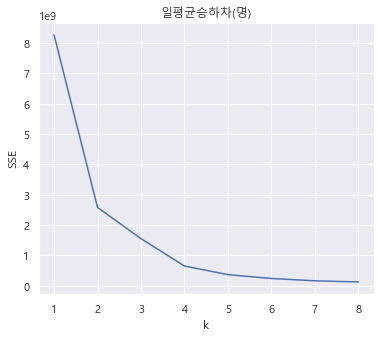

In [32]:
# 일평균승하차(명)
df_oneman = pd.DataFrame(use_df['일평균승하차(명)'])

inertia= []
for k in range(1,9):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(df_oneman)
    inertia.append(km.inertia_)
plt.figure(figsize=(6,5))
plt.plot(range(1,9), inertia)
plt.title('일평균승하차(명)')
plt.xlabel('k')
plt.ylabel('SSE')
plt.show()

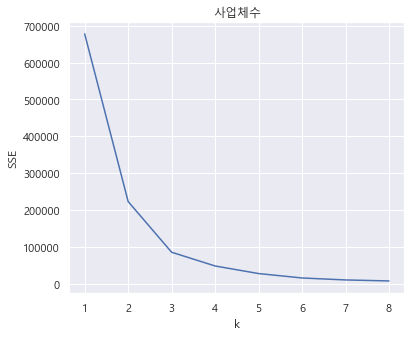

In [33]:
# 사업체수
df_oneman = pd.DataFrame(use_df['사업체수'])

inertia= []
for k in range(1,9):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(df_oneman)
    inertia.append(km.inertia_)
plt.figure(figsize=(6,5))
plt.plot(range(1,9), inertia)
plt.title('사업체수')
plt.xlabel('k')
plt.ylabel('SSE')
plt.show()

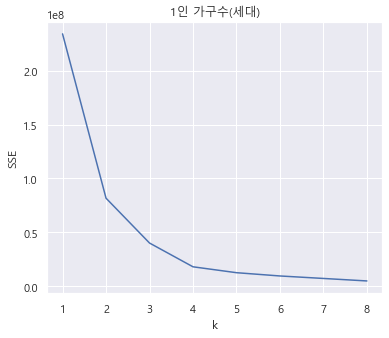

In [34]:
# 1인 가구수(세대)
df_oneman = pd.DataFrame(use_df['1인 가구수(세대)'])

inertia= []
for k in range(1,9):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(df_oneman)
    inertia.append(km.inertia_)
plt.figure(figsize=(6,5))
plt.plot(range(1,9), inertia)
plt.title('1인 가구수(세대)')
plt.xlabel('k')
plt.ylabel('SSE')
plt.show()

In [16]:
# 군집 4
# 적절한 군집수로 군집 예측값 생성

cluster_model = KMeans(n_clusters=4,        # =k
                       n_init=3,           # centroid를 몇번 샘플링한건지, 많이 돌릴수록 안정화된 결과가 나옴
                       max_iter=500,        # K-Means를 몇번 반복 수행할건지
                       )

cluster_model.fit(use_df)

centers = cluster_model.cluster_centers_    # 각 군집의 중심점
pred = cluster_model.predict(use_df)     # 각 예측군집

print(pd.DataFrame(centers))
print(pred[:10])

              0            1           2             3          4  \
0   7004.607143  3677.839286   54.714286  20413.232143   6.163571   
1  27481.666667  3517.416667  107.750000  23307.250000  10.308333   
2  57826.000000  4449.000000  380.000000  40014.000000  18.000000   
3  16005.129032  3582.387097   69.483871  22092.032258  10.648710   

              5  
0  2.413043e+06  
1  1.193083e+07  
2  3.938885e+07  
3  6.467572e+06  
[0 0 0 3 0 1 3 3 3 0]


In [17]:
# 군집 4
# 클러스터링 결과에 따른 각 데이터별 군집 번호를 데이터프레임에 추가
cluster_df = use_df.copy()
cluster_df['kmeans_group'] = pred
cluster_df

,일평균승하차(명),1인 가구수(세대),사업체수,거주자수,주택수,일평균(원),kmeans_group
역사명,,,,,,,
가야역,5799,6291,49,25217,17.50,1926082,0
감전역,6107,5461,57,12825,4.00,2535118,0
강서구청,4251,4630,109,2076,0.33,2029127,0
개금역,13621,2501,36,27187,10.00,4717075,3
거제(법원·검찰청),9546,3093,114,27403,12.70,3099526,0
...,...,...,...,...,...,...,...
충렬사(안락),5398,1851,35,18134,4.00,1117126,0
토성,13846,2110,7,28882,17.00,6002230,3
하단,29080,4414,36,21407,14.00,11010043,1


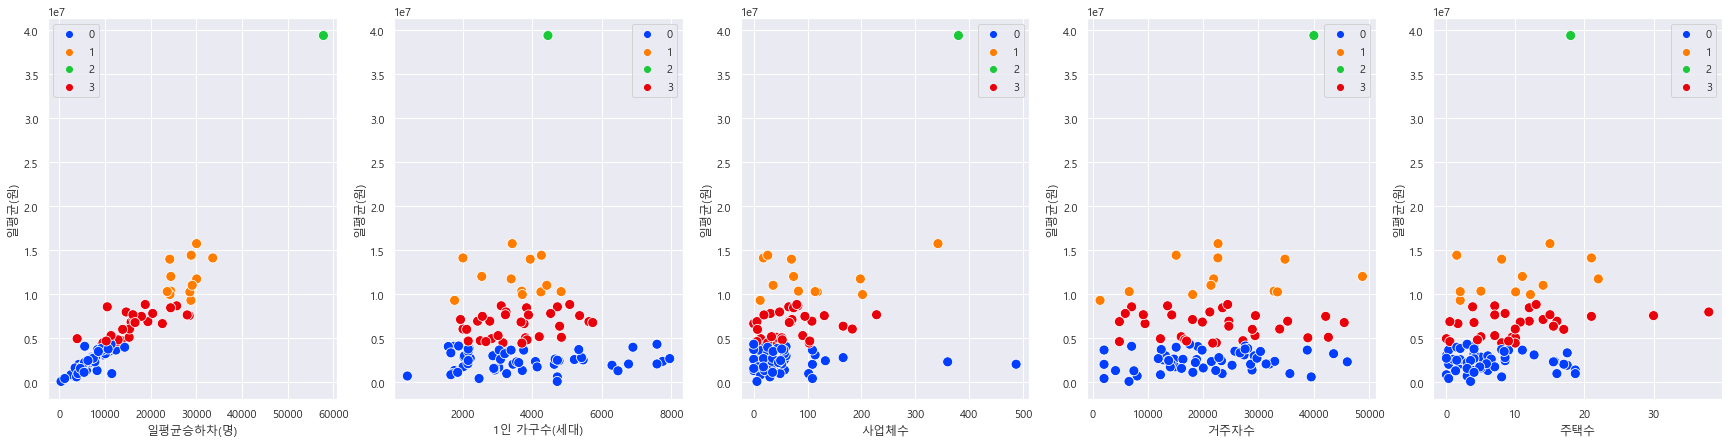

In [20]:
# Kmeans 군집 4
plt.figure(figsize=(30,7))
X= cluster_df
plt.subplot(151)    
sns.scatterplot(x=X.iloc[:,0], y=X.iloc[:,5], data=use_df, hue=cluster_model.labels_, palette='bright', s= 100) #
#plt.scatter(centers[:,0], centers[:,2], c='black', alpha=0.8, s=150,  marker='^')

plt.subplot(152)
sns.scatterplot(x=X.iloc[:,1], y=X.iloc[:,5], data=use_df, hue=cluster_model.labels_, palette='bright', s= 100) #
#plt.scatter(centers[:,1], centers[:,2], c='black', alpha=0.8, s=150, marker='^')

plt.subplot(153)  
sns.scatterplot(x=X.iloc[:,2], y=X.iloc[:,5], data=use_df, hue=cluster_model.labels_, palette='bright', s= 100) #
#plt.scatter(centers[:,2], centers[:,2], c='black', alpha=0.8, s=150,  marker='^')

plt.subplot(154)  
sns.scatterplot(x=X.iloc[:,3], y=X.iloc[:,5], data=use_df, hue=cluster_model.labels_, palette='bright', s= 100) #
#plt.scatter(centers[:,2], centers[:,2], c='black', alpha=0.8, s=150,  marker='^')

plt.subplot(155)  
sns.scatterplot(x=X.iloc[:,4], y=X.iloc[:,5], data=use_df, hue=cluster_model.labels_, palette='bright', s= 100) #
#plt.scatter(centers[:,2], centers[:,2], c='black', alpha=0.8, s=150,  marker='^')

plt.show()

In [24]:
# kmeans 군집 4
temp = cluster_df.groupby(['kmeans_group']).mean()
temp

,일평균승하차(명),1인 가구수(세대),사업체수,거주자수,주택수,일평균(원)
kmeans_group,,,,,,
0,7004.607143,3677.839286,54.714286,20413.232143,6.163571,2.413043e+06
1,27481.666667,3517.416667,107.750000,23307.250000,10.308333,1.193083e+07
2,57826.000000,4449.000000,380.000000,40014.000000,18.000000,3.938885e+07
3,16005.129032,3582.387097,69.483871,22092.032258,10.648710,6.467572e+06


In [25]:
group_0 = cluster_df[cluster_df['kmeans_group']==0]
group_1 =cluster_df[cluster_df['kmeans_group']==1]
group_2 = cluster_df[cluster_df['kmeans_group']==2]
group_3 = cluster_df[cluster_df['kmeans_group']==3]

In [26]:
group_0.head(60)

,일평균승하차(명),1인 가구수(세대),사업체수,거주자수,주택수,일평균(원),kmeans_group
역사명,,,,,,,
가야역,5799,6291,49,25217,17.50,1926082,0
감전역,6107,5461,57,12825,4.00,2535118,0
강서구청,4251,4630,109,2076,0.33,2029127,0
거제(법원·검찰청),9546,3093,114,27403,12.70,3099526,0
구남역,7021,2029,16,12321,5.00,2848324,0
구명역,5185,3035,32,15518,6.80,1670759,0
구포,5530,1733,54,7059,3.80,4080959,0
국금융센터·부산은행역,8248,1752,0,4145,6.00,1318702,0
금련산역,11471,1689,102,23430,16.00,976234,0


In [27]:
group_1

,일평균승하차(명),1인 가구수(세대),사업체수,거주자수,주택수,일평균(원),kmeans_group
역사명,,,,,,,
경성부경대역,24395,3694,83,32821,5.00,10345206,1
남포,28802,1762,12,1355,2.00,9296111,1
동래,28565,4246,118,33434,10.03,10257972,1
부산,30061,3391,198,21898,22.00,11733629,1
부산대,24167,3939,70,34792,8.00,13975371,1
사상역,33585,2003,18,22656,21.00,14117468,1
센텀시티역,28867,4259,26,15117,1.50,14421978,1
수영역,24200,3710,202,18105,12.17,9960743,1
시청,23612,4827,114,6623,2.00,10293857,1


In [28]:
group_2

,일평균승하차(명),1인 가구수(세대),사업체수,거주자수,주택수,일평균(원),kmeans_group
역사명,,,,,,,
서면역,57826,4449,380,40014,18.0,39388852,2


In [29]:
group_3

,일평균승하차(명),1인 가구수(세대),사업체수,거주자수,주택수,일평균(원),kmeans_group
역사명,,,,,,,
개금역,13621,2501,36,27187,10.00,4717075,3
광안역,16701,2424,108,24654,16.00,6932781,3
괴정,15271,4835,42,42636,9.50,5103298,3
교대,22544,3761,0,9487,1.67,6656075,3
구서,15857,2774,66,35275,12.00,6933445,3
금곡역,3881,2827,13,12279,0.00,4943795,3
냉정역,9535,3154,26,22381,8.00,4475283,3
노포,19370,5628,6,4858,0.50,6881813,3
대연역,15595,4784,166,24632,15.50,6362253,3


In [30]:
group_0.to_excel("kmeans_group_0.xlsx")
group_1.to_excel("kmeans_group_1.xlsx")
group_2.to_excel("kmeans_group_2.xlsx")
group_3.to_excel("kmeans_group_3.xlsx")

In [45]:
cluster_df.to_csv("Kmeans(정규화X).csv",encoding='cp949')